## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

C:\Users\Maulin\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Maulin\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Reading the CSV file

In [21]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Understanding

In [3]:
print(data.shape)
print(data.info())

(21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [4]:
print(data['date'].nunique())

372


In [22]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day

In [25]:
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
30      2014-11-10
31      2014-12-01
32      2014-06-24
33      2014-11-10
34      2014-12-03
35      2014-06-13
36      2014-05-28
37      2014-12-30
38      2015-02-13
39      2014-06-20
40      2014-07-15
41      2014-08-11
42      2014-07-07
43      2014-10-28
44      2014-07-29
45      2014-07-18
46      2015-03-25
47      2014-07-16
48      2015-04-28
49      2015-03-11
50      2014-09-16
51      2015-02-17
52      2014

In [5]:
data.drop(['id','date','zipcode'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,18


In [6]:
X = data.drop(['price'],axis=1)
y = data['price']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,18


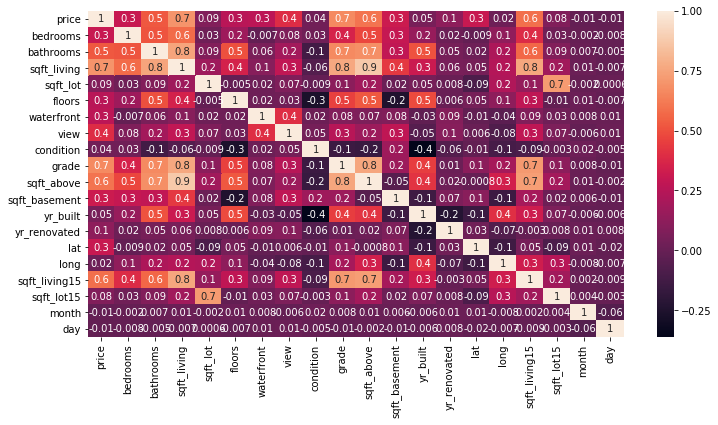

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,fmt='.1g',ax=ax)

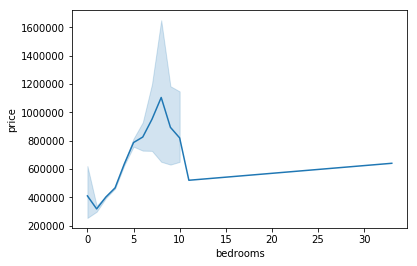

In [9]:
sns.lineplot('bedrooms','price',data=data)

In [10]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,6.574423,15.688197
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000


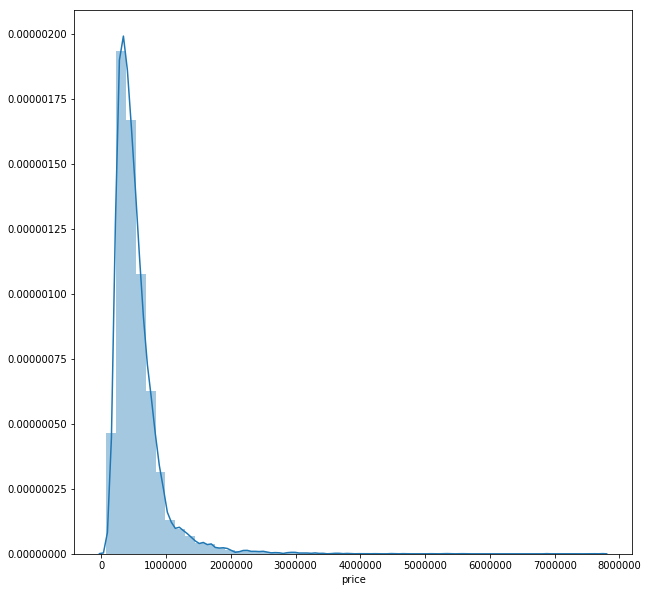

In [11]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.distplot(data['price'])

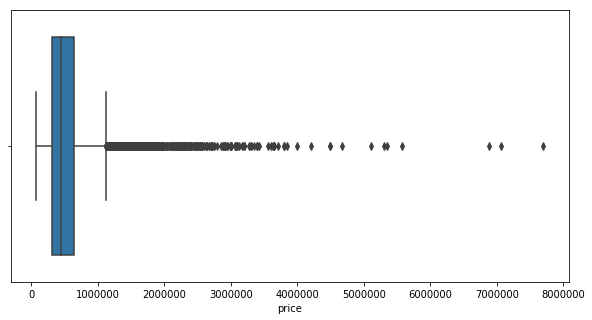

In [12]:
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(data['price'])

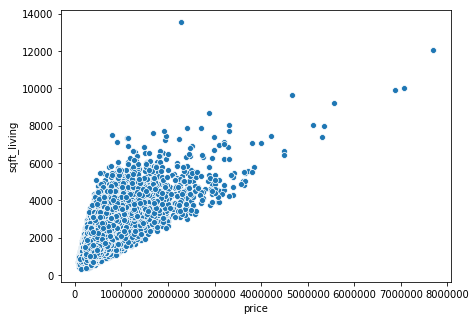

In [13]:
fig=plt.gcf()
fig.set_size_inches(7,5)
sns.scatterplot('price','sqft_living',data=data)

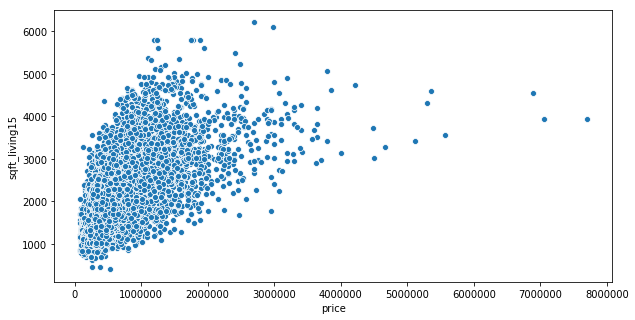

In [14]:
fig=plt.gcf()
fig.set_size_inches(10,5)
sns.scatterplot('price','sqft_living15',data=data)

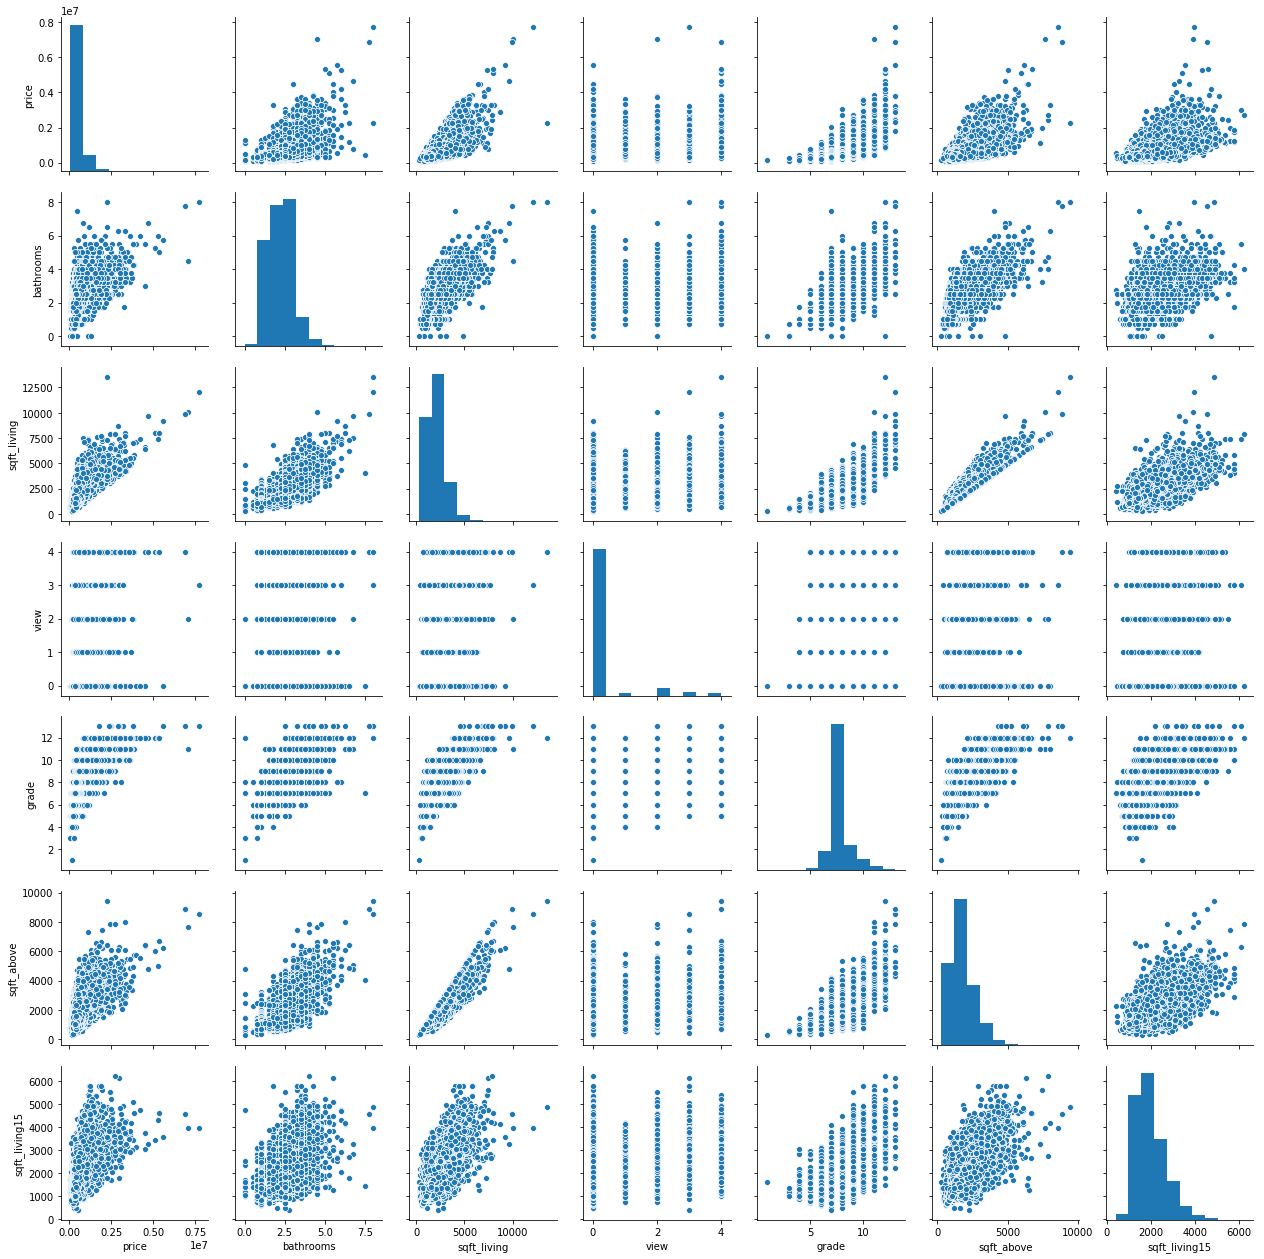

In [15]:
sns.pairplot(data[['price','bathrooms','sqft_living','view','grade','sqft_above','sqft_living15']])

In [16]:
data[data['price']>4000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,10,20
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,4,13
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,4,13
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408,8,15
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,6,11
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,8,4
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,10,13
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454,6,17
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,6,18
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,9,19


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.nunique()

bedrooms           12
bathrooms          29
sqft_living       923
sqft_lot         8406
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        842
sqft_basement     288
yr_built          116
yr_renovated       70
lat              4846
long              724
sqft_living15     710
sqft_lot15       7558
month              12
day                31
dtype: int64

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_test[0:5]

array([[ 0.67843709,  0.17763643, -0.00429299, -0.15206572,  0.92268978,
        -0.08499166, -0.30591651,  0.90907268,  0.29577684,  0.34571197,
        -0.65631017,  0.50592142, -0.20829394, -0.87792626,  0.37111117,
         0.59760397, -0.18256703,  1.09859931, -1.11836024],
       [ 1.75213752,  1.15576822,  0.91053768, -0.20775842, -0.91959976,
        -0.08499166, -0.30591651,  2.44357103,  0.29577684,  0.05359991,
         1.78263404,  0.20016039, -0.20829394,  0.85293775, -0.50436956,
         0.56824457, -0.23404851,  0.45602621,  0.61821774],
       [ 0.67843709,  0.50368036,  1.86945657, -0.10056993,  0.92268978,
        -0.08499166,  2.31969604, -0.62542567,  2.85917616,  2.41483899,
        -0.65631017,  0.87962934, -0.20829394,  0.03084958,  0.60599625,
         2.53532468, -0.11044936,  0.45602621, -0.07641345],
       [-0.39526335,  1.80785609,  2.74019902, -0.00491649,  0.92268978,
        -0.08499166,  2.31969604, -0.62542567,  3.7136426 ,  3.3763745 ,
        -0.656

# Linear Regression

In [21]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
print('Train_score:',linmodel.score(X_train,y_train))
print('Test_score:',linmodel.score(X_test,y_test))
predict_y_lin = linmodel.predict(X_test)
print('Test Mean squared error:',mean_squared_error(y_test, predict_y_lin))
#print('Test RMSE:',np.sqrt(mean_squared_log_error(y_test, predict_y_lin)))
print('Test mean absolute error',mean_absolute_error(y_test, predict_y_lin))
print('Test r2_score',r2_score(y_test, predict_y_lin))

Train_score: 0.6958724355975598
Test_score: 0.6965793613366006
Test Mean squared error: 45870134584.008385
Test mean absolute error 127575.91026674959
Test r2_score 0.6965793613366006


In [22]:
X_test.shape,y_test.shape

((4323, 19), (4323,))

In [23]:
# plt.scatter(X_test, y_test, color = "red")
# plt.plot(X_train, linmodel.predict(X_train), color = "green")
# plt.title("X vs price")
# plt.xlabel("X")
# plt.ylabel("price")
# plt.show()

# Ridge Regression

In [24]:
param_grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
ridgemodel = Ridge()
regressor_ridge = GridSearchCV(ridgemodel,param_grid)
regressor_ridge.fit(X_train,y_train)
print('Score:',regressor_ridge.score(X_test,y_test))
regressor_ridge.best_params_

Score: 0.696304555466521


{'alpha': 100}

In [25]:
param_grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
lassomodel = Lasso()
regressor_lasso = GridSearchCV(lassomodel,param_grid)
regressor_lasso.fit(X_train,y_train)
print('Score:',regressor_lasso.score(X_test,y_test))
regressor_lasso.best_params_

Score: 0.6963728437076135


{'alpha': 100}

# Polynomial Regression

In [26]:
poly = PolynomialFeatures(2)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
linpolymodel = LinearRegression()
linpolymodel.fit(X_train_poly,y_train)
linpolymodel.score(X_test_poly,y_test)

0.7806776958377056

# KNN Regressor

In [27]:
param_grid = {'n_neighbors':[5,10,15,20,25,30]}
knnmodel = KNeighborsRegressor()
regressor_knn = GridSearchCV(knnmodel,param_grid)
regressor_knn.fit(X_train,y_train)
print('Score:',regressor_knn.score(X_test,y_test))
regressor_knn.best_params_

Score: 0.7657467663578641


{'n_neighbors': 10}

# Decision Tree Regressor

In [28]:
param_grid = {'max_depth':[5,10,15,20,25,30]}
dtmodel = DecisionTreeRegressor('friedman_mse')
regressor_dt = GridSearchCV(dtmodel,param_grid)
regressor_dt.fit(X_train,y_train)
print('Test Score:',regressor_dt.score(X_test,y_test))
print('Train Score:',regressor_dt.score(X_train,y_train))
print('Decision_Tree best parameters:',regressor_dt.best_params_)

Test Score: 0.7463903088458723
Train Score: 0.9119420944704419
Decision_Tree best parameters: {'max_depth': 10}


# RandomForest Regressor

In [29]:
param_grid = {'max_depth':[5,10,15,20,25,30],
             'n_estimators':[20,50,100,500],
             'criterion':['friedman_mse','mse'],
             }
rfmodel = RandomForestRegressor()
regressor_rf = GridSearchCV(rfmodel,param_grid)
regressor_rf.fit(X_train,y_train)
print('Test Score:',regressor_rf.score(X_test,y_test))
print('Train Score:',regressor_rf.score(X_train,y_train))
print('Decision_Tree best parameters:',regressor_rf.best_params_)

Test Score: 0.8548834656105866
Train Score: 0.9833294510762525
Decision_Tree best parameters: {'criterion': 'friedman_mse', 'max_depth': 30, 'n_estimators': 500}


In [17]:
rfmodel = RandomForestRegressor(criterion= 'friedman_mse', max_depth = 10, n_estimators=10000,max_samples=0.9)
rfmodel.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_samples=0.9,
                      n_estimators=10000)

In [18]:
print('Test Score:',rfmodel.score(X_test,y_test))
print('Train Score:',rfmodel.score(X_train,y_train))

Test Score: 0.8438564075002012
Train Score: 0.9313664842581886


# XGBoost Regressor

In [20]:
xgmodel = xgb.XGBRegressor(n_estimators=100,learning_rate=0.08,gamma=0,subsample=0.75)
#regressor_xg = GridSearchCV(xgmodel,param_grid)
xgmodel.fit(X_train,y_train)
print('Test Score:',xgmodel.score(X_test,y_test))
print('Train Score:',xgmodel.score(X_train,y_train))
# print('Decision_Tree best parameters:',regressor_xg.best_params_)

Test Score: 0.8663377583234824
Train Score: 0.9487376269651442
